# Wrangle & Analyze Data: The WeRateDogs Twitter Archive

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling ">2. Data Wrangling (Gather, Assess, Clean)</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## 1. Introduction

The dataset, that I will wrangle and analyze, is the tweet archive known as WeRateDogs. This twitter account rates people's dogs with a humorous comment about the dog. The goal of this project consist on wrangle the data: gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. 

We import all libraries necessary for the project:

In [131]:
# Import packages for the data analysis
import pandas as pd
import numpy as np

# Import packages for extract data
import requests
import os
import json

# Import packages for the visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Data Wrangling

### 2.1 Gather

Gathering is the first step in the data wrangling process. In this part we download files .csv, .tsv and json data from Udacity webpage.
We have in total three souces:

###### 2.1.1 Enhanced Twitter Archive

The WeRateDogs Twitter archive has been download manually from the Udacity webpage: twitter_archive_enhanced.csv.
This Twitter archive contains basic tweet data for all 5000+ of their tweets (for example dog name, dog 'stage' and raiting).

In [132]:
# Load the enhanced twitter archive file
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv") 

# printing out few lines:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [133]:
# Dimension dataframe tweeter archive
print(twitter_archive.shape)

(2356, 17)


###### 2.1.2 Image prediction file

We download the file from the URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv , using the Requests Library. 

The imagine prediction file (image_predictions.tsv) give us information about what brend of dog is present in each tweet. In particular it contains the top three brend predictions for each tweet ID, the image URL, and the image number corresponded to the most confident prediction.

In [134]:
# Download image predictions file from the Udacity website
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)

# save tsv to file
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [135]:
# Load the image predictions file 
image_prediction = pd.read_csv("image_predictions.tsv", sep="\t") 

In [136]:
# Print out few raw
image_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [137]:
# shape dataframe image prediction
print(image_prediction.shape)

(2075, 12)


###### 3.1.3 Tweet JSON Data

We download the file from the URL: https://video.udacity-data.com/topher/2018/November/5bf60fda_tweet-json/tweet-json, using the Requests Library. Each tweet's JSON data is written to its own line in a file called tweet_json.txt file. The file contains additional infomation: retweet count and favorite count.

In [138]:
#download file json
response = requests.get('https://video.udacity-data.com/topher/2018/November/5bf60fda_tweet-json/tweet-json')
with open('tweet_json.txt', mode = 'wb') as file:
  file.write(response.content)

f = 'tweet_json.txt'
records = [json.loads(line) for line in open(f)]
records[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [139]:
# From the text file read the JSON data
selected_attr = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        
        # create a dictionary with the JSON data, then add to a list tweet_id, favorites, retweets from the JSON data
        selected_attr.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count']})
# convert the tweet JSON data dictionary list to a DataFrame
tweet_selected_attr = pd.DataFrame(selected_attr, columns=['tweet_id','favorites','retweets'])

In [140]:
# print out few raw dataframe tweet_selected_attr
tweet_selected_attr.head(5)

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [141]:
# shape dataframe JSON data
print(tweet_selected_attr.shape)

(2354, 3)


In [142]:
# store the variables tweet_id, favorites and retweets in the file tweet_data_json.csv 
tweet_selected_attr.to_csv('tweet_data_json.csv', index = False)

### 2.2 Assess

In this section I assess data, previously gathered.Assessing data is the second step in the data wrangling. The goal of this process is identify data quality issues (content issues) and lack of tidiness (structural issues).

This project request that that only tweets with original ratings with images, no retweets, be considered. Those two information are in the tweeter archive file. After that the original tweets will be merge with the image prediction and Json data. 

###### 2.2.1 Enhanced Twitter Archive

In [143]:
# few raws the the twitter archive
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [144]:
# general info: data type and number value non-null for each column in the dataframe 
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [145]:
#statistical information for numerical columns in the dataframe
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> First considerations: We have in total 2356 tweets ID.
>With the previous methods head and info we are able to understand how many tweets have original ratings with images, no retweets or replies: 

>- Columns with retweets information are retweeted_status_id (float64 type), retweeted_status_user_id (float64 type), retweeted_status_timestamp (string type). They contain in total 181 values non-null. I will not take in consideration them in the analysis of the tweets with original ratings.

>- Columns with replies information are in_reply_to_status_id (float64 type), and  in_reply_to_user_id (float64). They contain in total 78 values non-null. I will not take in consideration them in the analysis of the tweets with original ratings.

>- The last four columns doggo, floofer, pupper and puppo indicate the four dog 'stage'. They don't contain null values. They are in total 2356 values.
 
>- The column timestamp contains time and date of the tweet, so should be datetime type and not a string type. There are not missing values.

>- The columns rating_numerator and rating_denominator give us informations about the rating. From the method describe, we can see that the rating_numerator has as a minimum 0 and as a maximum 1776, while the 	rating_denominator has as minimum 0 and as a maximum 170.

>- tweet_id should be a string type, and not numerical type.

Below we analyze each column.

 - Column 'name'
 
We use the method value_counts in order to check how many names there are in the columns and if there are some anomalies on them

In [146]:
# count name values 
twitter_archive['name'].value_counts().head(15)

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Penny       10
Tucker      10
Lola        10
Bo           9
Winston      9
the          8
Sadie        8
an           7
Daisy        7
Name: name, dtype: int64

The are some name not capitalized and probably are not dogs name:

In [147]:
# list all names not capitalized
name_lowercase = twitter_archive['name'].str.contains('^[a-z]', regex = True)

#counts names not capitalized
twitter_archive[name_lowercase].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [148]:
# total names lowercase not correct
print('Total names number not corrected is: ', len(twitter_archive[name_lowercase]))

Total names number not corrected is:  109


In total there are 109 tweets with a not valid name. 

 - expanded_urls

With the info method we found that there are 2297 expanded_urls (59 missing values). We want to check if those missing values are all refer to replies and retweets:

In [149]:
# number of missing values expanded_urls: we obtain this number with the method .isna
print("The number of tweets with missing urls is: ", sum(twitter_archive['expanded_urls'].isna()))

The number of tweets with missing urls is:  59


In [150]:
# Number of tweets this missing urls and in the same time are retweets (We obtain it using the operator &)
sum(twitter_archive["expanded_urls"].isnull() & (twitter_archive["retweeted_status_id"].notnull()))

1

In [151]:
# Number of tweets this missing urls and in the same time are replies (We obtain it using the operator &)
sum(twitter_archive["expanded_urls"].isnull() & (twitter_archive["in_reply_to_status_id"].notnull()))

55

There are in total 59 tweets without urls, (1 is retweet, and 55 are replies). We have to check if the 3 left with missing urls (by tweet ID) are also in imagine prediction file and Json data: 

In [152]:
# display the 3tweets with missing urls and at the same time are not replies and retweets
miss_urls = twitter_archive['expanded_urls'].isna() & twitter_archive['retweeted_status_id'].isnull() & twitter_archive['in_reply_to_status_id'].isnull()
twitter_archive[miss_urls][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


In [153]:
#We are looking for if those 3 three ID are in the prediction image file
tweet_id_check = [828361771580813312, 785515384317313025, 696518437233913856]
tweet_id_image = image_prediction['tweet_id'].isin(tweet_id_check)
image_prediction[tweet_id_image]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [155]:
#We are looking for if those 3 three ID are in the Json data file
tweet_id_check = [828361771580813312, 785515384317313025, 696518437233913856]
tweet_id_json = tweet_selected_attr['tweet_id'].isin(tweet_id_check)
tweet_selected_attr[tweet_id_json]

,tweet_id,favorites,retweets
374,828361771580813312,2408,195
706,785515384317313025,6800,1477
1443,696518437233913856,4274,1887


In conclusion those three tweets ID with missing urls (and only with original tweets) are present in JSON data but not in imagine prediction file. So, we can not take them in consideration. 

 - Columns rating_numerator and rating_denominator
 
With the method describe we found that the maximum value for the rating_numerator is 1776, and for the rating_denominator is 170.

Bolow, we check the distribution of the raiting for the numerator and denominator:

In [156]:
#overview distribution of rating numerator
twitter_archive['rating_numerator'].value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [157]:
#overview distribution rating denominator
twitter_archive['rating_denominator'].value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

For the our analysis, we will consider only tweets with rating denominator ugual to 10. So the next step is to check how many original tweets (not replies and retweets) there are with rating denominator different to 10 

In [158]:
#display tweets with denominator different than 10, and in the same time they are not replies and retweets
check_denominator = (twitter_archive['rating_denominator'] != 10) & \
                     twitter_archive['in_reply_to_status_id'].isna() & \
                     twitter_archive['retweeted_status_id'].isna() 

check_columns = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
twitter_archive[check_denominator][check_columns]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,24,7
902,Why does this never happen at my front door......,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She ...",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved sq...,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #Final...,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very pre...,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,45,50


In [159]:
# How many total rating different to 10, for original tweets
sum(check_denominator)

17

We are only interested in rating denominator ugual to 10, and we check the dostribution of the rating numerator:

In [160]:
tweets_dnm_10 = twitter_archive[twitter_archive['rating_denominator'] == 10]
tweets_dnm_10['rating_numerator'].value_counts().sort_index(ascending = False)

1776      1
666       1
420       2
182       1
75        2
27        1
26        1
17        1
15        2
14       54
13      351
12      558
11      463
10      461
9       156
8       102
7        54
6        32
5        37
4        15
3        19
2         9
1         8
0         2
Name: rating_numerator, dtype: int64

In [28]:
# How many rating_numerator >= 15 with the condition that the rating_denominator is ugual to 10.
sum(tweets_dnm_10['rating_numerator'] >= 15)

12

I will take in consideration only tweets that have denominators ugual to 10, we notice that 12 tweets have numerators greater or ugual 15. We use 15 as the lower boundary because we got just 2 counts, while 14 has a count of 54. 

In [161]:
# Counts tweets with numerator >= 15 and in the same time have denominator of 10,
# and are not replies and are not retweets
rating_esclude = (twitter_archive['rating_denominator'] == 10) & \
                 (twitter_archive['rating_numerator'] >= 15) & \
                  twitter_archive['in_reply_to_status_id'].isna() & \
                  twitter_archive['retweeted_status_id'].isna()
sum(rating_esclude)

5

We have 5 tweets (excluding retweets and replies) with denominator = 10 and numerator >= 15. We will not take them in consideration.

###### Columns dog stages: doggo, floofer, pupper, puppo

In [162]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [163]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [164]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [165]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

###### 2.2.2 Image prediction file

In [166]:
image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [167]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [168]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Image Predictions File

a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

Image Predictions columns:

 - tweet_id: tweet identifier
 - jpg_url: dog's image
 - img_num: image number 
 - p1: is the algorithm's #1 prediction for the image in the tweet 
 - p1_conf is how confident the algorithm is in its #1 prediction 
 - p1_dog is whether or not the #1 prediction is a breed of dog
 - p2 is the algorithm's second most likely prediction
 - p2_conf is how confident the algorithm is in its #2 prediction 
 - p2_dog is whether or not the #2 prediction is a breed of dog 
 - p3: the algorithm's third most likely prediction 
 - p3_conf: is how confident the algorithm is in its #3 prediction 
 - p3_dog is whether or not the #3 prediction is a breed of dog 

In [169]:
# Quantity first predictions are actually dog or not
image_prediction['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [170]:
# Quantity second predictions are actually dog or not
image_prediction['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [174]:
# Quantity third predictions are actually dog or not
image_prediction['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

###### 2.2.3 JSON data

In [175]:
tweet_selected_attr.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [176]:
tweet_selected_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [177]:
tweet_selected_attr.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


The file JSON data has in total 2354 entries, with any missing value. It is contains three columns:
    - tweet ID: tweet identifier
    - retweets count: for each tweet received it indicate the number of retweets
    - favorites: for each tweet received it indicate the number of favorites

### Quality issues:

#### - Tweeter Archive Data
    
> - Quality issue 1: Columns with retweets information - retweeted_status_id, retweeted_status_user_id,    retweeted_status_timestamp contain in total 181 values non-null. 

> - Quality issue 2: Columns with replies information - reply_to_status_id, in_reply_to_user_id contain in total 78 values non-null. 

> - Quality issue 3: Column with urls information has 2297 expanded_urls not null, and 59 tweets without urls (1 is retweet, and 55 are replies); and the three others are present in JSON data but not in imagine prediction file. 

> - Quality issue 4: Column name: dogs without names are 'None' instead NaN (they are  745) and some names (in total 109) are not correct

> - Quality issue 5: Column timestamp has not a correct format (data, time, +000) and it should be a datetime type, and not a string format. 

> - Quality issue 6: Columns dog stages - doggo, floofer, pupper, and puppo have values that are the string "None" instead of NaN

> - Quality issue 7: Column 'rating_denominator': there are 17 original tweets with rating_denominator different  to 10 (13 of them are about multiple dogs/pups, and can be removed)

> - Quality issue 8: Column 'rating_denominator': 4 tweets have the correct rating within the text but not in the  columns 'rating_numerator' and 'rating_denominator'. I will fix it manually:
>     740373189193256964: replace 9/11 with 14/10;
>     716439118184652801: replace 50/50 with 11/10;
>     682962037429899265: replace 7/11 with 10/10;
>     666287406224695296: replace 1/2 with 9/10;
      
> - Quality issue 9: Column 'rating_numerator': it contains 28 tweets with rating_numerator greater or ugual to 15. The maximum value is 1776, which does not make sense. For tweets with rating_denominator ugual to 10, there are 12 tweets with rating_numerator >= 15 (7 of them are retweets and replies, and 5 original tweets). 

> - Quality issue 10: column tweet ID: it is a numerical type (int64). It should be a string type


####  - Image prediction data

> - Quality issue 1: There are 2356 tweets in the twitter archive dataframe and 2075 rows in the image prediction dataframe. 
> - Quality issue 2: Columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog - we will create one column for image prediction and one column for confidence level

#### - JSON data

> - We didn't find quality issue. The file has 2356 rows, the same of tweeter archive file.

### tidiness issues:

#### - Tweeter Archive data

> - Tidiness issue 1: Columns refer to retweets and replies tweets will be removed. 

> - Tidiness issue 2: Columns refer to replies tweets will be removed. 

> - Tidiness issue 3: 3 dog stage in 4 different columns (doggo, floofer, pupper, and puppo).  

> - Tidiness issue 4: Column rating_denominator will be removed.

#### - Image Predictions Data

> - Tidiness issue 1: image prediction data should be combined with the archive table. 
> - Tidiness issue 2: we will remove all columns not necessary 

#### - JSON  Data

> - Tidiness issue 1: The json_data table should be combined with the archive table.

### Clean

In [178]:
# Make copies of the dataframes for cleaning
archive_clean = twitter_archive.copy()
predictions_clean = image_prediction.copy()
json_data_clean = tweet_selected_attr.copy()

### Quality issue 1: tweeter archive data

We start with columns refer to retweets information - retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp contain in total 181 values non-null. We’re only interested in “original tweets”.

#### Define: 
Remove all rows containing retweets, where these 3 columns will be non-null

In [179]:
#info tweeter archive file:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [180]:
#select row with columns retweets are not null
retweets = archive_clean.loc[archive_clean['retweeted_status_id'].notnull()]
#drop those lines
archive_clean = archive_clean.drop(retweets.index, axis=0)

#### Test

In [181]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

The rows with columns refer to retweets information have been removed correctly: the columns retweets have 0 values and the dataframe contains 2175 values. 

### Quality issue 2: tweeter archive data

Columns with replies information - in_reply_to_status_id, in_reply_to_user_id contain in total 78 values non-null. We’re only interested in “original tweets”.

#### Define:

Remove all rows containing replies, where these 2 columns will be non-null.

#### Code:

In [182]:
# #select row with columns retweets are not null
replies = archive_clean.loc[archive_clean['in_reply_to_status_id'].notnull()]
#drop those lines
archive_clean = archive_clean.drop(replies.index, axis=0)

#### Test:

In [183]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

The rows with columns refer to replies information have been removed correctly: the replies columns have 0 values and the dataframe contains 2097 values.

### Tidiness issue 1: tweeter archive data

All columns related to retweets information don't contain any value (we're not interested in retweets).

#### Define:

we can drop all columns related to retweets: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

#### Code:

In [184]:
archive_clean = archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

#### Test:

In [185]:
# list columns in the dataframe
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Tidiness issue 2: tweeter archive data

All columns related to replies information don't contain any value (we're not interested in replies).

#### Define:

Drop all columns related to replies: in_reply_to_status_id and in_reply_to_user_id.

#### Code:

In [186]:
archive_clean = archive_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

#### Test:

In [187]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Quality issue 3: tweeter archive data (second part)

56 tweets without urls (1 is retweet, and 55 are replies) have been removed previosly. and the three others without urls are present in JSON data but not in imagine prediction file.

#### Define:
Tweets ID 828361771580813312, 785515384317313025, 696518437233913856 will be removed.

#### Code:

In [188]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [189]:
urls_missing = archive_clean['expanded_urls'].isna()
archive_clean[urls_missing]

# 828361771580813312, 785515384317313025, 696518437233913856

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,12,10,None,None,None,None,None
707,785515384317313025,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,10,10,None,None,None,None,None
1445,696518437233913856,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,None,None,pupper,None


In [190]:
# select row tweet ID: 828361771580813312
line_one = archive_clean[archive_clean['tweet_id'] == 828361771580813312]
# select row tweet ID: 785515384317313025
line_two = archive_clean[archive_clean['tweet_id'] == 785515384317313025]
# select row tweet ID: 696518437233913856
line_three = archive_clean[archive_clean['tweet_id'] == 696518437233913856]

In [191]:
# drop tweet ID: 828361771580813312
archive_clean = archive_clean.drop(line_one.index, axis=0)

In [192]:
# drop tweet ID: 785515384317313025
archive_clean = archive_clean.drop(line_two.index, axis=0)

In [193]:
# drop tweet ID: 696518437233913856
archive_clean = archive_clean.drop(line_three.index, axis=0)

#### Test:

In [194]:
# How many null values are in the column 'expanded_urls'?
sum(archive_clean['expanded_urls'].isnull())

0

In [195]:
# general information dataframe 
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   doggo               2094 non-null   object
 9   floofer             2094 non-null   object
 10  pupper              2094 non-null   object
 11  puppo               2094 non-null   object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


Tweets ID 828361771580813312, 785515384317313025, 696518437233913856 have been removed correctly.
In the dataframe tweeter_archive we don't have anymore missing data. 

> The next step are: 
>  - clean the columns relative to the ratinng (rating_numerator and rating_denominator),
>  - move the four columns (doggo, floofer, pupper and puppo) to unique column dog_stage, 

### Quality issue 8: tweeter archive data
Some tweets have wrong values extracted for rating; text contains the tweeter's rating.

#### Define:
we have to fix manually those ratings:

- 740373189193256964: replace 9/11 with 14/10
- 716439118184652801: replace 50/50 with 11/10
- 682962037429899265: replace 7/11 with 10/10
- 666287406224695296: replace 1/2 with 9/10

#### Code:

In [196]:
# change the rating for the tweet ID: 740373189193256964
row_1 = archive_clean.tweet_id == 740373189193256964
archive_clean.loc[row_1, 'rating_numerator'] = 14
archive_clean.loc[row_1, 'rating_denominator'] = 10

In [197]:
# change the rating for the tweet ID: 716439118184652801
row_2 = archive_clean.tweet_id == 716439118184652801
archive_clean.loc[row_2, 'rating_numerator'] = 11
archive_clean.loc[row_2, 'rating_denominator'] = 10

In [198]:
# change the rating for the tweet ID: 682962037429899265
row_3 = archive_clean.tweet_id == 682962037429899265
archive_clean.loc[row_3, 'rating_numerator'] = 10
archive_clean.loc[row_3, 'rating_denominator'] = 10

In [199]:
# change the rating for the tweet ID: 666287406224695296
row_4 = archive_clean.tweet_id == 666287406224695296
archive_clean.loc[row_4, 'rating_numerator'] = 9
archive_clean.loc[row_4, 'rating_denominator'] = 10

#### Test:

In [200]:
# check if the three tweets ID have the correct rating
columns = ['tweet_id', 'rating_numerator', 'rating_denominator']
archive_clean[(archive_clean.tweet_id == 740373189193256964) | \
              (archive_clean.tweet_id == 716439118184652801) | \
              (archive_clean.tweet_id == 682962037429899265) | \
              (archive_clean.tweet_id == 666287406224695296) ][columns]

,tweet_id,rating_numerator,rating_denominator
1068,740373189193256964,14,10
1202,716439118184652801,11,10
1662,682962037429899265,10,10
2335,666287406224695296,9,10


### Quality issue 7: tweeter archive data

Some tweets with rating_denominator not equal to 10; multiple dogs or no valid rating.

#### Define:

Drop all tweets with rating_denominator values that are not equal to 10.

#### Code:

In [201]:
# display denominators
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
120       1
110       1
90        1
80        2
70        1
50        2
40        1
20        1
10     2081
7         1
Name: rating_denominator, dtype: int64

In [202]:
# select all rows with rating_denominator is different to 10
denominator = archive_clean[archive_clean['rating_denominator'] != 10]

In [203]:
# drop all rows selected with rating_denominator is different to 10
archive_clean = archive_clean.drop(denominator.index, axis=0)

#### Test:

In [204]:
# check the values in the column 
archive_clean['rating_denominator'].value_counts().sort_index(ascending = False)

10    2081
Name: rating_denominator, dtype: int64

In [205]:
# shape dataframe
archive_clean.shape[0]

2081

In the column 'rating_denominator' we have only the value '10'. The dataframe has in total 2081 rows.

### Quality issue 9: tweeter archive data

There are 5 tweets with rating_numerator greater or ugual to 15

#### Define: 
We will remove tweets that have those rating_numerator.

#### Code

In [206]:
# overview distribution rating_numerator
archive_clean['rating_numerator'].value_counts().sort_index(ascending = False)

1776      1
420       1
75        1
27        1
26        1
14       39
13      287
12      485
11      414
10      435
9       153
8        98
7        51
6        32
5        34
4        15
3        19
2         9
1         4
0         1
Name: rating_numerator, dtype: int64

In [207]:
# select row with rating_numerator >= 15
numerator = archive_clean[archive_clean['rating_numerator'] >= 15]

In [208]:
# delect row selected with rating_numerator >= 15
archive_clean = archive_clean.drop(numerator.index, axis=0)

#### Test:

In [209]:
# check the values in the column
archive_clean['rating_numerator'].value_counts().sort_index(ascending = False)

14     39
13    287
12    485
11    414
10    435
9     153
8      98
7      51
6      32
5      34
4      15
3      19
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

In [210]:
# shape dataframe
archive_clean.shape[0]

2076

Now in the column rating_numerator we have only rating from '0' to '14' and the dataframe contains 2076 rows.

## tidiness issue 4: tweeter archive data

The column rating denominator contains only values ugual to 10. It is unnecessary column.

#### Define:

We drop the column rating denominator.

#### Code:

In [211]:
# drop column rating_denominator
archive_clean = archive_clean.drop('rating_denominator', axis = 1)

#### Test: 

In [212]:
# list columns in the dataframe
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Tidiness issue 3: tweeter archive data

There are 4 columns for dog stages: doggo, floofer, pupper, puppo.

#### Define:

We will combine dog stage columns (doggo, floofer, pupper, puppo) into one 'dog_stage' column. After that, we will drop the separate dog stage categories.

#### Code:

In [213]:
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2076,2076,2076,2076
unique,2,2,2,2
top,None,None,None,None
freq,1993,2066,1848,2052


In [214]:
#  in the four columns replace empty entries with a blank space 
archive_clean['doggo'].replace('None', '', inplace=True)
archive_clean['floofer'].replace('None', '', inplace=True)
archive_clean['pupper'].replace('None', '', inplace=True)
archive_clean['puppo'].replace('None', '', inplace=True)

# Create a new column 'dog_stage'
archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

# Counts the different stages in the column 'dog_stage'
archive_clean['dog_stage'].value_counts()

                1742
pupper           219
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

We have 11 entries that have at the same time two stages (9 with doppo-pupper, 1 with doppo-floofer, 1 with doppo-puppo). We can drop the separate dog stage categories.

In [215]:
# Replace blank cells with NaNs
archive_clean.loc[archive_clean.dog_stage == '', 'dog_stage'] = np.nan
# Replace NaNs with text so we have non-null values
archive_clean['dog_stage'] = archive_clean['dog_stage'].fillna('Unknown')

archive_clean['dog_stage'].value_counts()

Unknown         1742
pupper           219
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [216]:
# drop four columns separate dog stages
archive_clean = archive_clean.drop(['pupper',
                                    'doggo',
                                    'puppo',
                                    'floofer'], axis = 1)

#### Test:

In [217]:
# list columns in the dataframe
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'name',
 'dog_stage']

The four columns have been removed.

### Tidiness issue 2: image prediction data

We want to create two columns: one for image prediction and one for confidence level. And then, remove columns 'p1','p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

#### Define:

In order to create new column for the image prediction and one for confidence level, we have:
 - create two new empty list: dog_type (that indicate the dog's brend predected), and confidence_level (that indicate the corrispective confidence level).
 - create a function image that adds values in the lists dog_type and confidence_level when P1_dog, P2_dog, P3_dog are always True. It means when the prediction is in fact a type of dog. 
 - creation new two columns 
 - remove from the lists cases with errors

#### Code:

In [218]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [219]:
# creation list dog_type and confidence_level in order to use in the function image
dog_type = []
confidence_level = []

def image(predictions_clean):
    if predictions_clean['p1_dog'] == True:
        dog_type.append(predictions_clean['p1'])
        confidence_level.append(predictions_clean['p1_conf'])
    elif predictions_clean['p2_dog'] == True:
        dog_type.append(predictions_clean['p2'])
        confidence_level.append(predictions_clean['p2_conf'])
    elif predictions_clean['p3_dog'] == True:
        dog_type.append(predictions_clean['p3'])
        confidence_level.append(predictions_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_level.append('Error')

predictions_clean.apply(image, axis=1)

#create new columns
predictions_clean['dog_type'] = dog_type
predictions_clean['confidence_level'] = confidence_level

In [220]:
predictions_clean = predictions_clean[predictions_clean['dog_type'] != 'Error'

#### Test:

In [221]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1751 non-null   int64  
 1   jpg_url           1751 non-null   object 
 2   img_num           1751 non-null   int64  
 3   p1                1751 non-null   object 
 4   p1_conf           1751 non-null   float64
 5   p1_dog            1751 non-null   bool   
 6   p2                1751 non-null   object 
 7   p2_conf           1751 non-null   float64
 8   p2_dog            1751 non-null   bool   
 9   p3                1751 non-null   object 
 10  p3_conf           1751 non-null   float64
 11  p3_dog            1751 non-null   bool   
 12  dog_type          1751 non-null   object 
 13  confidence_level  1751 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


In [222]:
predictions_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


The new two columns with the brend prediction and the corrispective confidence level in the predictions dataframe have been created.

### Tidiness issue 2: image prediction data

We don't need anymore for the anymore the columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog. They are replace with dog_type (dog brend oìprediction) and confidence_level.

#### Define: 
We drop the columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog.

#### Code:

In [223]:
predictions_clean = predictions_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

#### Test:

In [224]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1751 non-null   int64 
 1   jpg_url           1751 non-null   object
 2   img_num           1751 non-null   int64 
 3   dog_type          1751 non-null   object
 4   confidence_level  1751 non-null   object
dtypes: int64(2), object(3)
memory usage: 82.1+ KB


The columns have been removed.

### Tidiness issue 1: image prediction data

We have to join the image prediction file with the tweeter archive file.

#### Define:

Merge the image prediction file with the tweeter archive table.
The new table will be tweeter_archive_master.

#### Code:

In [225]:
twitter_archive_master = pd.merge(archive_clean, predictions_clean, on='tweet_id')

#### Test:

In [226]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1651 entries, 0 to 1650
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1651 non-null   int64 
 1   timestamp         1651 non-null   object
 2   source            1651 non-null   object
 3   text              1651 non-null   object
 4   expanded_urls     1651 non-null   object
 5   rating_numerator  1651 non-null   int64 
 6   name              1651 non-null   object
 7   dog_stage         1651 non-null   object
 8   jpg_url           1651 non-null   object
 9   img_num           1651 non-null   int64 
 10  dog_type          1651 non-null   object
 11  confidence_level  1651 non-null   object
dtypes: int64(3), object(9)
memory usage: 167.7+ KB


### Tidiness issue 1: json data 

We have to join the json data with the tweeter archive master dataframe.

#### Define: 

Merge the json data file with the tweeter archive master dataframe.

#### Code:

In [227]:
twitter_archive_master = pd.merge(twitter_archive_master, json_data_clean, 
                         on = 'tweet_id', how = 'inner')

#### Test:

In [228]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1651 entries, 0 to 1650
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1651 non-null   int64 
 1   timestamp         1651 non-null   object
 2   source            1651 non-null   object
 3   text              1651 non-null   object
 4   expanded_urls     1651 non-null   object
 5   rating_numerator  1651 non-null   int64 
 6   name              1651 non-null   object
 7   dog_stage         1651 non-null   object
 8   jpg_url           1651 non-null   object
 9   img_num           1651 non-null   int64 
 10  dog_type          1651 non-null   object
 11  confidence_level  1651 non-null   object
 12  favorites         1651 non-null   int64 
 13  retweets          1651 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 193.5+ KB


In [229]:
twitter_archive_master.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,jpg_url,img_num,dog_type,confidence_level,favorites,retweets
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,Unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,33819,6514
1,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,Unknown,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,25461,4328
2,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,Unknown,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,42908,8964
3,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,Unknown,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,41048,9774
4,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,None,Unknown,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,20562,3261


The dataset twitter_archive_master has been created in order to answer to the following questions:

1) Which breed are most popular?
2) Which is the rating distribution?
3) Which is the common stage?
4) Analysis: Correlation between retweets and favorites counts

## Exploratory Data Analysis

In [230]:
#Store the clean DataFrame in a CSV file
twitter_archive_master.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

#### Question 1: Which breed are most popular (top 10)?

To answer to this question we use the method value_counts

In [231]:
# display top 10 dog brends
twitter_archive_master['dog_type'].value_counts()[0:10].sort_values(axis=0, ascending=False)

golden_retriever      154
Labrador_retriever    103
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   47
Samoyed                42
Pomeranian             40
malamute               33
Name: dog_type, dtype: int64

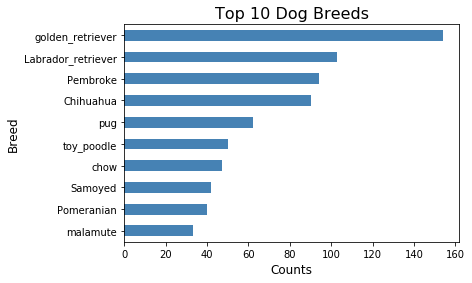

In [235]:
top_10_breeds = twitter_archive_master['dog_type'].value_counts()[0:10].sort_values(axis=0, ascending=True)
top_10_breeds.plot(kind = 'barh', color=['steelblue'])
plt.title('Top 10 Dog Breeds', size=16)
plt.xlabel('Counts', size=12)
plt.ylabel('Breed', size=12)
plt.savefig('top-breeds.png');

The most common dog breed predected is the Golden Retriever with 154 tweets.

#### Question 2: Which is the rating distribution?

In [233]:
twitter_archive_master['rating_numerator'].value_counts().sort_index(ascending = False)

14     22
13    221
12    421
11    353
10    359
9     132
8      68
7      31
6      16
5      14
4       6
3       5
2       2
0       1
Name: rating_numerator, dtype: int64

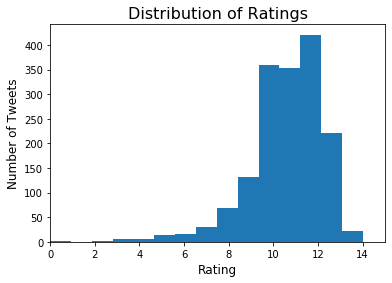

In [236]:
twitter_archive_master['rating_numerator'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.xlabel('Rating', fontsize = 12)
plt.title('Distribution of Ratings', fontsize = 16)
plt.savefig('Raiting.png');

In [129]:
twitter_archive_master['rating_numerator'].describe()

count    1651.000000
mean       10.820109
std         1.783013
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

We can see that from the histogram and from the statistics the 75% of the raiting is at 12.

#### Question 3: Which is the common stage?

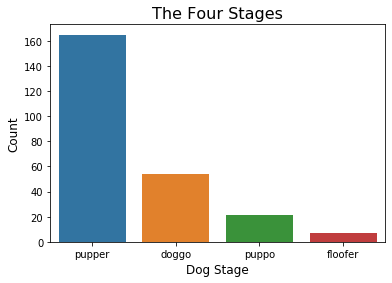

In [247]:
stages_dog = twitter_archive_master['dog_stage'].value_counts()[1:5].index
sns.countplot(data = twitter_archive_master, x = 'dog_stage', order = stages_dog)
plt.xlabel('Dog Stage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('The Four Stages',fontsize=16)
plt.savefig('common-stage.png');

Most dogs are classified in the 'Pupper' stage.

##### Analysis: Correlation between Retweets and Favorites counts

It is obvious that when a picture is retweeted, it will be more favorite in contrast to other posts that receiced less rating and minus visibility. 
We can see those aspects the following grafics:

> - 'Correlation between retweets and favorites posts': if the post is retweeted more times, it will get more visibility.

> - 'Retwees counts - Ratings' shows that the haigher rated dogs receive more retweets.

> - 'Favorites counts - Ratings' shows that the haigher rated dogs are more favorites.

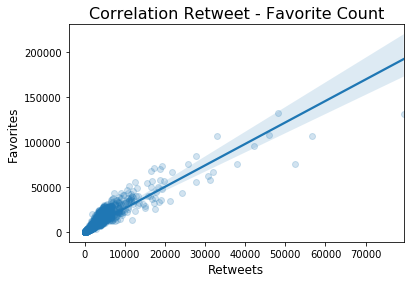

In [238]:
sns.regplot(x="retweets", y="favorites", data=twitter_archive_master, scatter_kws={'alpha':0.2})
plt.title('Correlation Retweet - Favorite Count', size=16)
plt.xlabel('Retweets', size=12)
plt.ylabel('Favorites', size=12)
plt.savefig('Correlation.png');

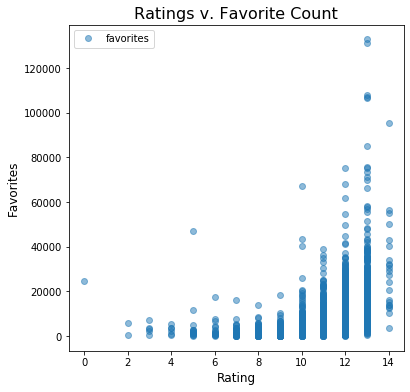

In [245]:
twitter_archive_master.plot(x = 'rating_numerator', y = 'favorites', style ='o', alpha=.5, figsize=(6,6));
plt.title('Ratings v. Favorite Count', size=16)
plt.xlabel('Rating', size=12)
plt.ylabel('Favorites', size=12);
plt.savefig('rating-favorites.png');

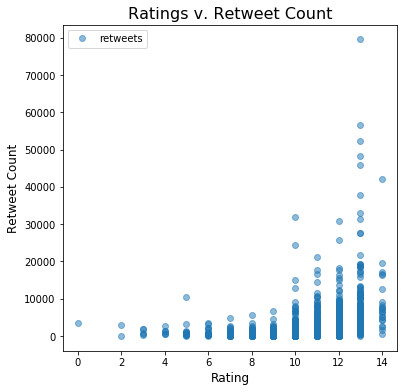

In [242]:
twitter_archive_master.plot(x = 'rating_numerator', y = 'retweets', style ='o', alpha=.5, figsize=(6,6));
plt.title('Ratings v. Retweet Count', size=16)
plt.xlabel('Rating', size=12)
plt.ylabel('Retweet Count', size=12);
plt.savefig('rating-ret.png');